### Importing the necessary library


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
import warnings

warnings.filterwarnings('ignore')


#### Loading the dataset into dataframe

In [3]:
Credit_card=pd.read_csv('C:\\Users\\nages\\Downloads\\archive\\creditcard.csv')

In [4]:
# getting the shape
Credit_card.shape

(284807, 31)

In [5]:
#getting the first 5 datarows
Credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#getting the last 5 datarows
Credit_card.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
#information about the dataset
Credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Number of missing values

In [8]:
Credit_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

###### Dataset has no null values

#Distribution of normal and fraud transcation

In [9]:
Credit_card['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

From the above result we can see the data is highly imbalanced

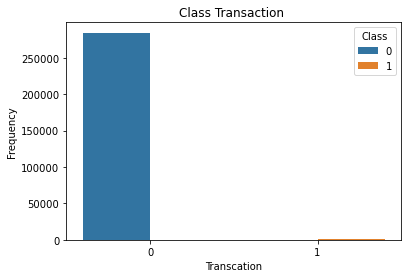

In [10]:
#Visulazing the Class 

sns.countplot(x=Credit_card.Class, hue=Credit_card.Class)
plt.ylabel('Frequency')
plt.xlabel('Transcation')
plt.title('Class Transaction ')

#display counterplot
plt.show()



# Seperating the data for analysis

In [11]:
Normal= Credit_card[Credit_card.Class == 0]
fraud = Credit_card[Credit_card.Class == 1]

In [12]:
#getting the shape
print(Normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


**Statistical information about amount column**

In [13]:
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

## Comparing both the values of transaction

In [15]:
Credit_card.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321




##### Undersampling

 We are going to build a sample dataset containg similar distribution of Normal transaction and fraud transactions

no of fraud transactions are 492 so we are going to take sample of 492 Normal transaction to make the data balanced.

In [16]:
Normal_sample=Normal.sample(n=492)

print(Normal_sample.shape)
print(fraud.shape)

(492, 31)
(492, 31)


In [17]:
#Fetching the top rows of normal sample dataset
Normal_sample.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
41796,40829.0,-0.601779,0.340669,2.434380,3.394656,-1.055304,1.335073,0.413437,0.331217,-0.420532,...,0.301849,0.988440,0.277690,0.438777,-0.362201,0.386318,0.172998,0.177442,188.22,0
78079,57362.0,1.027943,-0.297304,0.582307,0.574865,-0.354662,0.582375,-0.398495,0.368189,0.416311,...,-0.184332,-0.456084,0.109640,-0.288276,0.091444,0.327814,-0.006732,0.002602,42.01,0
115295,73822.0,0.920083,-0.085790,0.128287,1.217457,-0.103758,-0.155778,0.326102,-0.029225,-0.253665,...,0.134814,0.315382,-0.215803,0.274613,0.691456,-0.291539,0.005127,0.023540,119.42,0
200277,133368.0,-1.149590,0.164088,2.200153,0.382761,-1.010548,0.214685,-0.611999,0.588748,-1.399248,...,-0.154002,-0.177830,-0.086286,-0.062675,0.257584,-0.428573,0.036206,-0.013515,64.00,0
155337,105185.0,-0.605459,0.917276,2.369555,-0.139944,0.140190,-0.259833,0.522574,-0.295835,1.562154,...,-0.287622,-0.399948,-0.306285,-0.112976,0.239806,-0.738243,-0.212029,-0.143259,0.80,0


# Concatnating the both data set to get new dataset

In [18]:
#New Dataset
new_credit_card=pd.concat([Normal_sample,fraud],axis=0)

In [19]:
#fetching the top 5 rows of new dataset
new_credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
41796,40829.0,-0.601779,0.340669,2.434380,3.394656,-1.055304,1.335073,0.413437,0.331217,-0.420532,...,0.301849,0.988440,0.277690,0.438777,-0.362201,0.386318,0.172998,0.177442,188.22,0
78079,57362.0,1.027943,-0.297304,0.582307,0.574865,-0.354662,0.582375,-0.398495,0.368189,0.416311,...,-0.184332,-0.456084,0.109640,-0.288276,0.091444,0.327814,-0.006732,0.002602,42.01,0
115295,73822.0,0.920083,-0.085790,0.128287,1.217457,-0.103758,-0.155778,0.326102,-0.029225,-0.253665,...,0.134814,0.315382,-0.215803,0.274613,0.691456,-0.291539,0.005127,0.023540,119.42,0
200277,133368.0,-1.149590,0.164088,2.200153,0.382761,-1.010548,0.214685,-0.611999,0.588748,-1.399248,...,-0.154002,-0.177830,-0.086286,-0.062675,0.257584,-0.428573,0.036206,-0.013515,64.00,0
155337,105185.0,-0.605459,0.917276,2.369555,-0.139944,0.140190,-0.259833,0.522574,-0.295835,1.562154,...,-0.287622,-0.399948,-0.306285,-0.112976,0.239806,-0.738243,-0.212029,-0.143259,0.80,0


In [20]:
#shape of the dataset
new_credit_card.shape

(984, 31)

In [21]:
#Comparing the values 
new_credit_card.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92059.813008,0.103736,-0.015454,0.121898,-0.082058,-0.045858,0.008030,-0.012901,0.046938,-0.057820,...,-0.017644,-0.016331,-0.008532,0.021204,0.004127,-0.021525,-0.028863,-0.021819,-0.005372,81.347805
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [22]:
#Spliting the data into test and train

x = new_credit_card.drop(columns='Class', axis=1)
y = new_credit_card['Class']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 1)

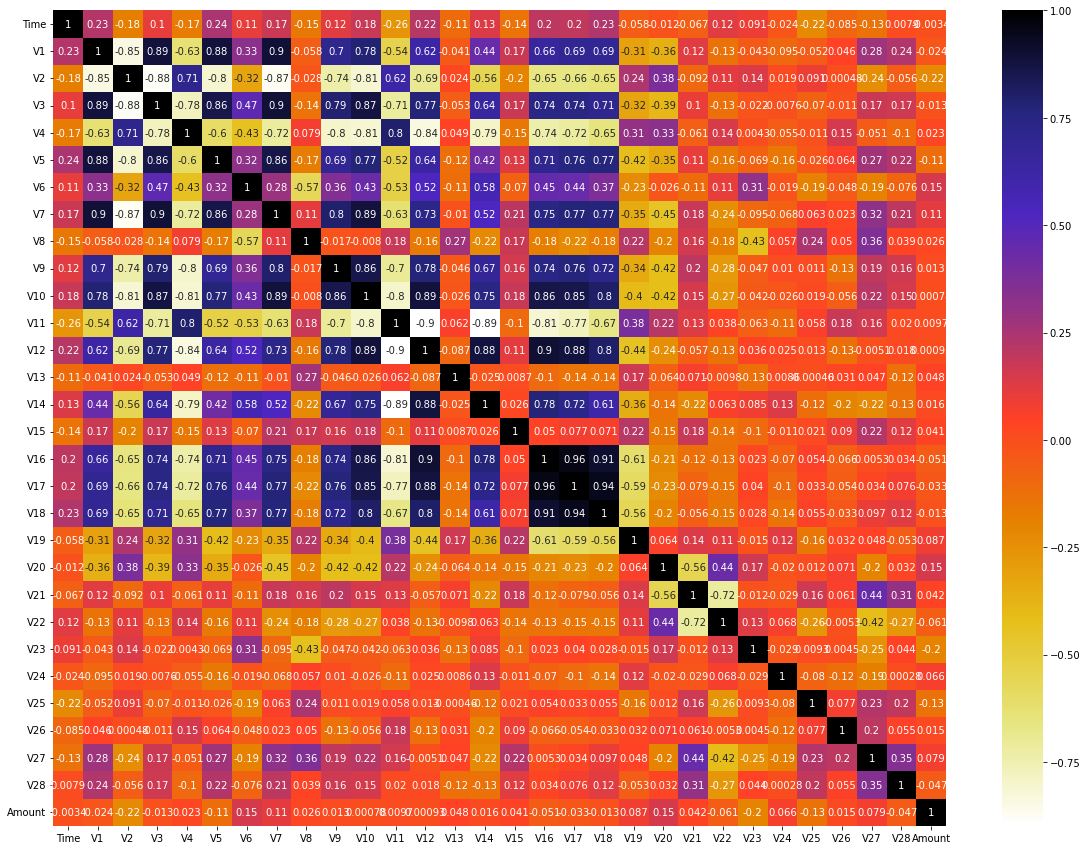

In [23]:
#visualizing the features

plt.figure(figsize=(20,15))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [24]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [25]:
corr_features = correlation(x_train, 0.7)
len(set(corr_features))
corr_features



{'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'V2',
 'V22',
 'V3',
 'V4',
 'V5',
 'V7',
 'V9'}

In [26]:


x_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
194991,130854.0,1.855179,0.214714,-0.083204,3.646190,0.018642,0.706315,-0.535528,0.262222,-0.577421,...,-0.293584,0.344008,1.047607,0.029946,-0.480015,-0.069792,0.194495,-0.000992,-0.052680,7.87
241254,150949.0,-2.423535,1.659093,-3.071421,2.588033,1.135791,-1.892388,-2.588418,-2.226592,-1.670173,...,0.353898,-0.934127,0.922038,-0.180255,-0.281719,0.299285,-0.263801,0.150156,0.292112,9.29
42674,41194.0,-7.896886,5.381020,-8.451162,7.963928,-7.862419,-2.376820,-11.949723,5.051356,-6.912076,...,0.645974,2.557944,0.926278,0.032795,0.638073,0.361887,0.444577,1.101923,0.205958,1.52
6820,8614.0,-2.169929,3.639654,-4.508498,2.730668,-2.122693,-2.341017,-4.235253,1.703538,-1.305279,...,0.500779,0.645103,-0.503529,-0.000523,0.071696,0.092007,0.308498,0.552591,0.298954,1.00
252774,155965.0,-1.201398,4.864535,-8.328823,7.652399,-0.167445,-2.767695,-3.176421,1.623279,-4.367228,...,0.597026,0.532320,-0.556913,0.192444,-0.698588,0.025003,0.514968,0.378105,-0.053133,0.77


In [27]:
#Getting the train data and test data shape
print(x_train.shape,x_test.shape,x.shape)

(787, 30) (197, 30) (984, 30)


## **Model Training**

**1.Logistic Regression**

In [28]:
# Accuracy on training data
model=model = LogisticRegression()

#model
model.fit(x_train, y_train)


X_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print(" Accuracy on Training Data: " , training_data_accuracy)

 Accuracy on Training Data:  0.9504447268106735


In [40]:
# Accuracy on testing data
X_test_prediction = model.predict(x_test)
#metrices for Decision Tree
print('Accuracy',accuracy_score(y_test, X_test_prediction))
print('Precision',precision_score(y_test, X_test_prediction))
print('Recall', recall_score(y_test, X_test_prediction))
print('F1_score',f1_score(y_test, X_test_prediction))


Accuracy 0.9238578680203046
Precision 0.9468085106382979
Recall 0.898989898989899
F1_score 0.9222797927461138


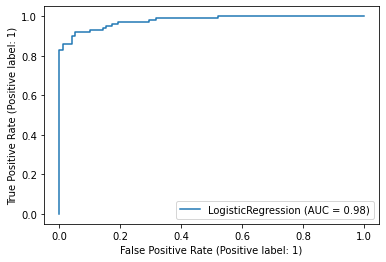

In [31]:
plot_roc_curve(model, x_test, y_test) #AUROC

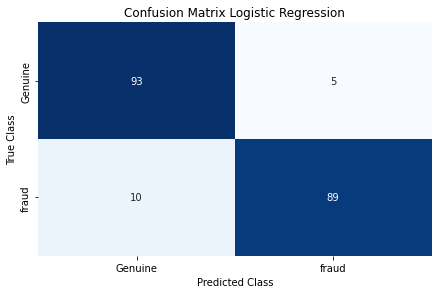

In [41]:
matrix_lg = confusion_matrix(y_test, X_test_prediction)
lg_cm = pd.DataFrame(matrix_svm, index=['Genuine', 'fraud'], columns=['Genuine', 'fraud'])

sns.heatmap(lg_cm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Logistic Regression"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

###  2. Decision tree classifier

Accuracy 0.8883248730964467
Precision 0.8737864077669902
Recall 0.9090909090909091
F1_score 0.891089108910891


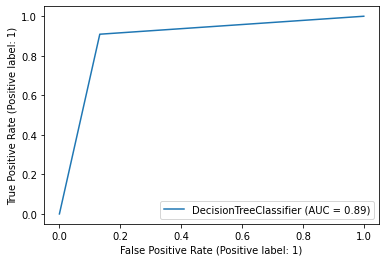

In [33]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier


decision_tree = DecisionTreeClassifier(random_state = 123)


decision_tree.fit(x_train,y_train)

y_predictions_dt = decision_tree.predict(x_test)


#metrices for Decision Tree
print('Accuracy',accuracy_score(y_test, y_predictions_dt))
print('Precision',precision_score(y_test, y_predictions_dt))
print('Recall', recall_score(y_test, y_predictions_dt))
print('F1_score',f1_score(y_test, y_predictions_dt))



plot_roc_curve(decision_tree, x_test, y_test) #AUROC

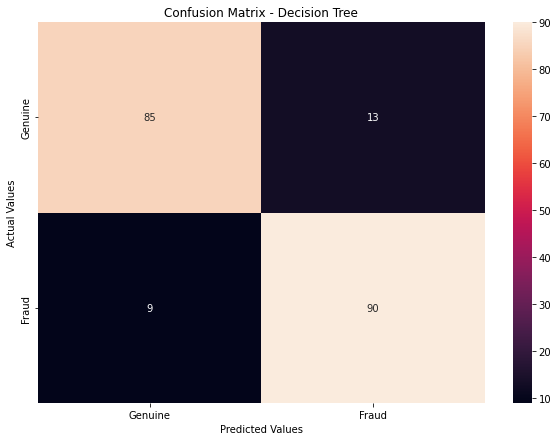

In [34]:
#Confusion matrix for Decision tree
confusion_matrix_dt = confusion_matrix(y_test, y_predictions_dt)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_dt, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()


### 3.SVM


In [35]:


model1 = SVC()
model1.fit(x_train,y_train)


SVC()

In [36]:
#train the model
model2 = SVC(probability=True, random_state=2)
svm = model2.fit(x_train, y_train)


In [37]:
y_pred_svm = model2.predict(x_test)

print("Accuracy SVM:",accuracy_score(y_test, y_pred_svm))
print("Precision SVM:",precision_score(y_test, y_pred_svm))
print("Recall SVM:",recall_score(y_test, y_pred_svm))
print("F1 Score SVM:",f1_score(y_test, y_pred_svm))



Accuracy SVM: 0.5482233502538071
Precision SVM: 0.5454545454545454
Recall SVM: 0.6060606060606061
F1 Score SVM: 0.5741626794258374


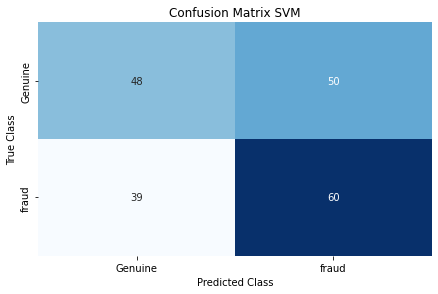

In [38]:
matrix_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm = pd.DataFrame(matrix_svm, index=['Genuine', 'fraud'], columns=['Genuine', 'fraud'])

sns.heatmap(cm_svm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix SVM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

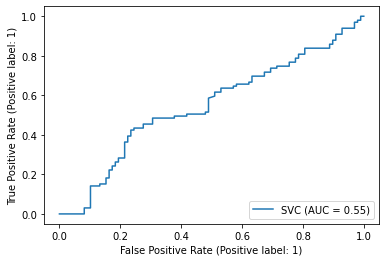

In [39]:
plot_roc_curve(model2, x_test, y_test) #AUROC